In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns

In [2]:
df = pd.read_csv('day.csv')
df.drop('instant', axis = 1, inplace = True)
df

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,27-12-2019,1,1,12,0,5,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,28-12-2019,1,1,12,0,6,0,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,29-12-2019,1,1,12,0,0,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,30-12-2019,1,1,12,0,1,1,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      730 non-null    object 
 1   season      730 non-null    int64  
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    int64  
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    int64  
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    int64  
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  casual      730 non-null    int64  
 13  registered  730 non-null    int64  
 14  cnt         730 non-null    int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 85.7+ KB


In [4]:
df.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [5]:
df.isnull().sum()

dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
df['workingday'].value_counts()

1    504
0    226
Name: workingday, dtype: int64

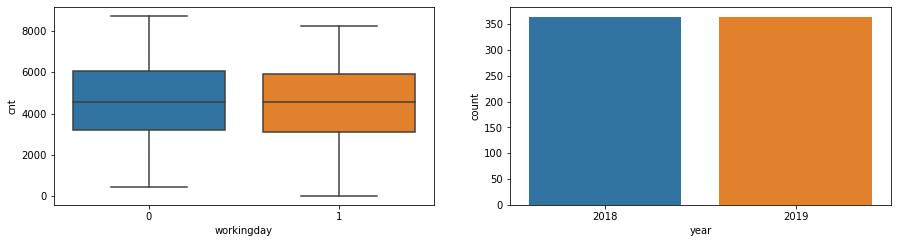

In [7]:
plt.figure(figsize=(15,8))
plt.subplot(2,2,1)
sns.boxplot(x = df['workingday'], y =df['cnt'])
plt.subplot(2,2,2)
sns.countplot(df['yr'])
plt.xlabel("year")
plt.xticks([0,1],[2018, 2019])
plt.show()

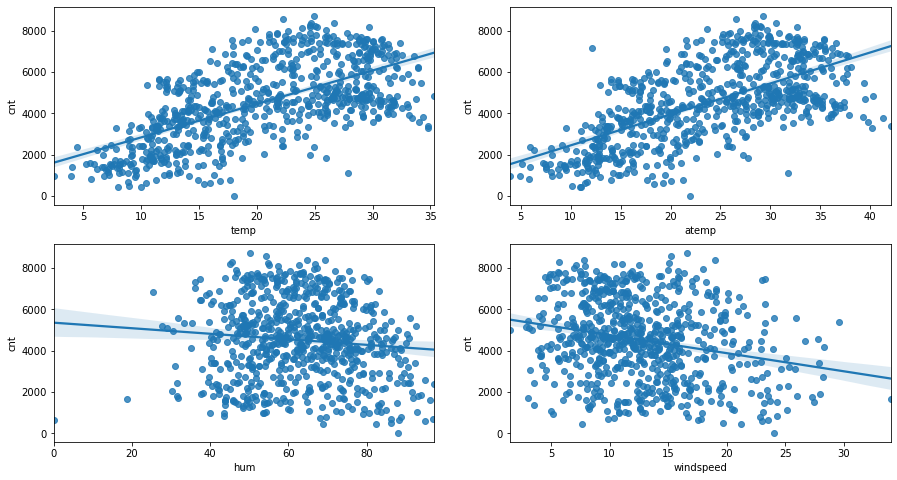

In [8]:
plt.figure(figsize = (15,8))
plt.subplot(2,2,1)
sns.regplot(data = df, x = 'temp' , y='cnt')
plt.subplot(2,2,2)
sns.regplot(data = df, x = 'atemp' , y='cnt')
plt.subplot(2,2,3)
sns.regplot(data = df, x = 'hum' , y='cnt')
plt.subplot(2,2,4)
sns.regplot(data = df, x = 'windspeed' , y='cnt')
plt.show()

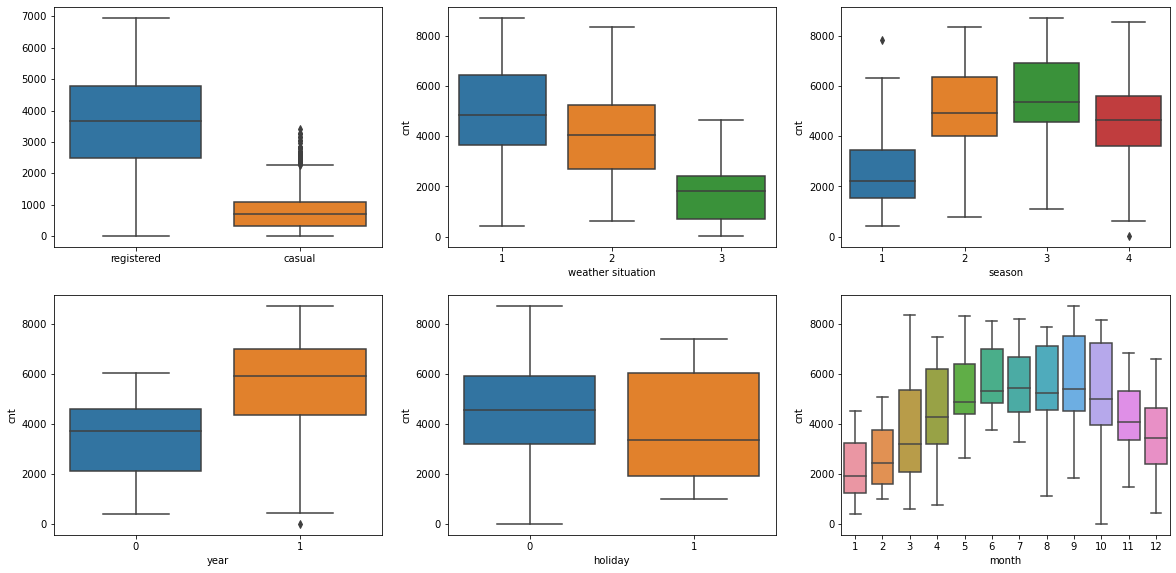

In [9]:
plt.figure(figsize=(20,15))
plt.subplot(3,3,1)
sns.boxplot(data =df[['registered', 'casual']])
plt.subplot(3,3,2)
sns.boxplot(x = df['weathersit'], y =df['cnt'])
plt.xlabel("weather situation")
plt.subplot(3,3,3)
sns.boxplot(x = df['season'], y =df['cnt'])
plt.subplot(3,3,4)
sns.boxplot(x = df['yr'], y =df['cnt'])
plt.xlabel("year")
plt.subplot(3,3,5)
sns.boxplot(x = df['holiday'], y =df['cnt'])
plt.subplot(3,3,6)
sns.boxplot(x = df['mnth'], y =df['cnt'])
plt.xlabel("month")
plt.show()

In [10]:
df["date"] = df['dteday'].apply(lambda x : int(x[0:2]))
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,date
0,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985,1
1,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801,2
2,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,3
3,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,4
4,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,5


<Figure size 1800x1440 with 0 Axes>

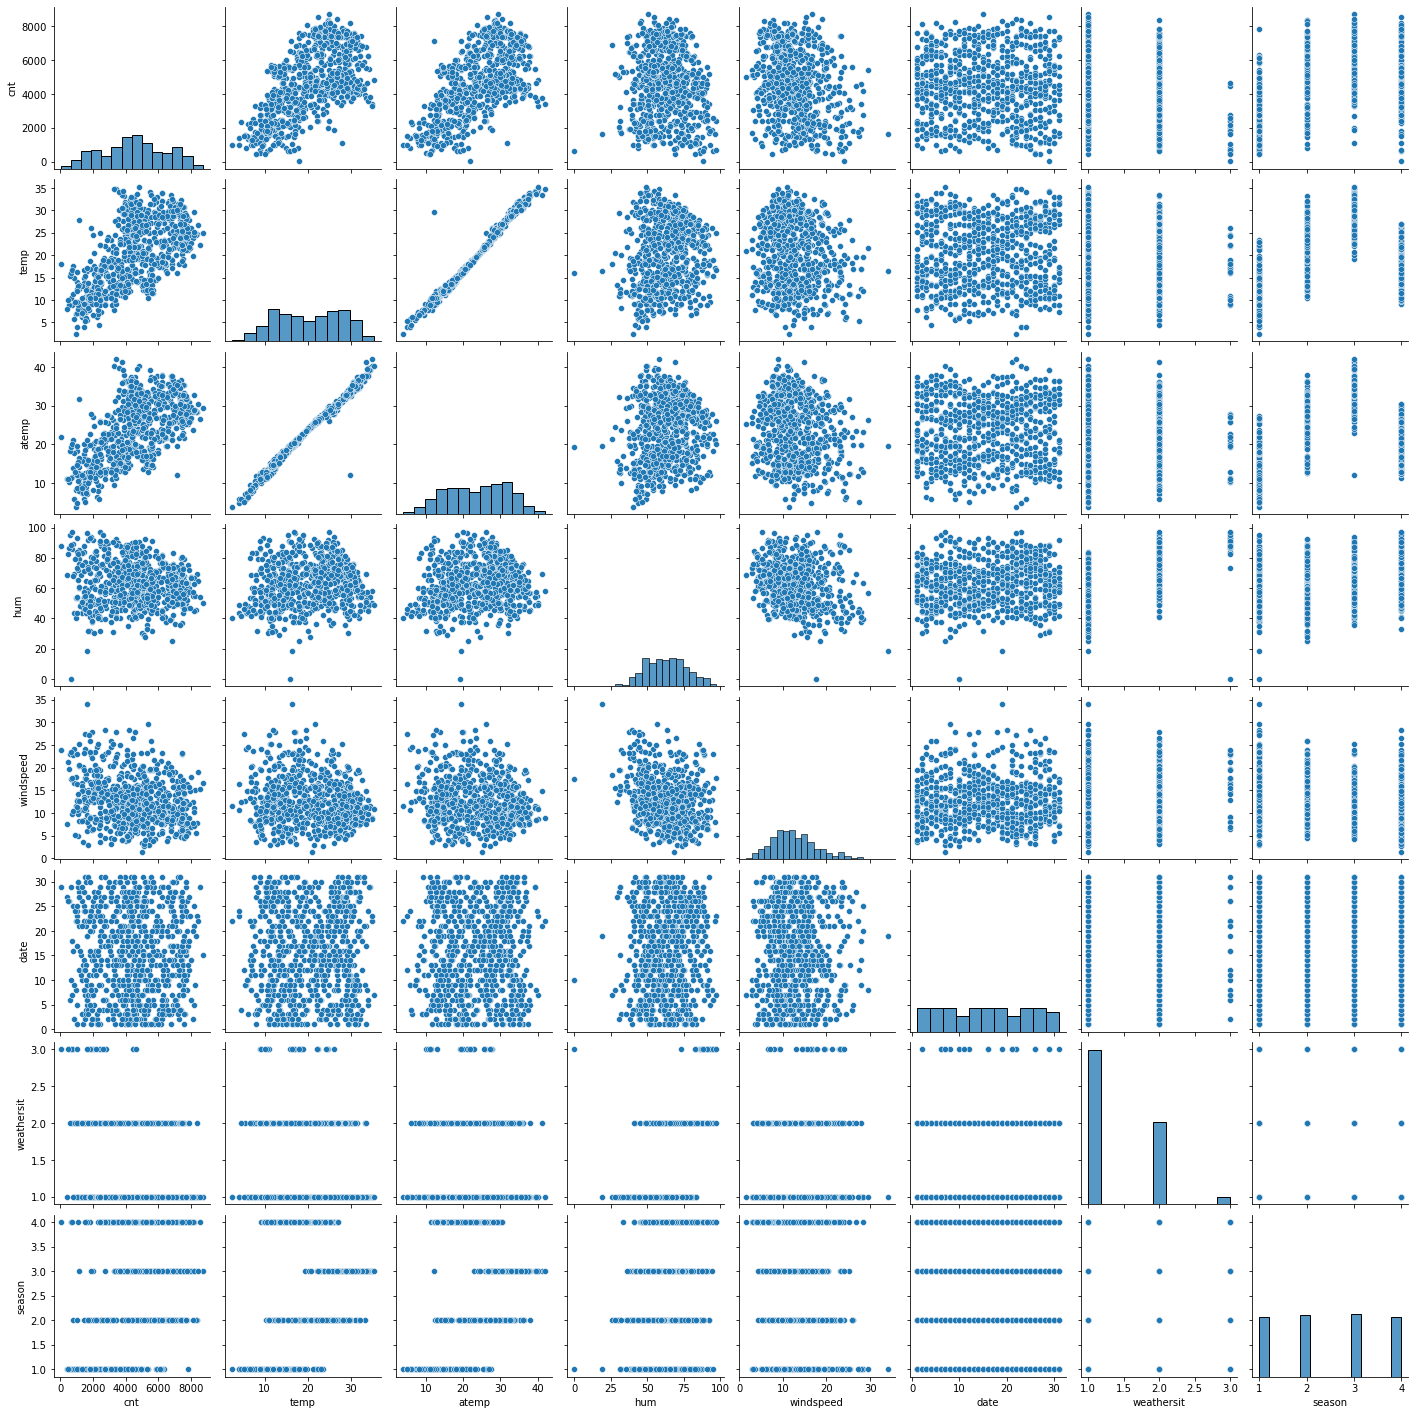

In [11]:
plt.figure(figsize=(25,20))
sns.pairplot(df[["cnt", "temp","atemp", "hum", "windspeed", "date","weathersit","season"]])
plt.show()

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      730 non-null    object 
 1   season      730 non-null    int64  
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    int64  
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    int64  
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    int64  
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  casual      730 non-null    int64  
 13  registered  730 non-null    int64  
 14  cnt         730 non-null    int64  
 15  date        730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [13]:
df.drop("dteday", axis =1, inplace = True)

In [14]:
date_gp = df.groupby('date').sum()
date_gp.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
date,,,,,,,,,,,,,,
1,60,12,156,0,70,17,37,495.334940,581.98880,1562.3315,265.070787,18178,85514,103692
2,60,12,156,1,73,16,36,487.166141,566.26160,1510.9654,304.280668,19724,85657,105381
3,60,12,156,1,69,15,33,476.419508,554.72915,1408.2598,296.919592,22112,89449,111561
4,60,12,156,2,65,16,33,487.543464,571.72195,1483.7734,317.935268,24047,88288,112335
5,60,12,156,1,75,18,33,484.871043,568.75580,1482.0710,323.614174,20012,89103,109115


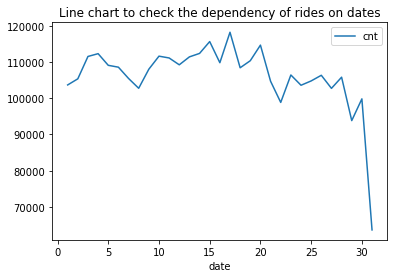

In [15]:
date_gp.plot.line(y='cnt')
plt.title("Line chart to check the dependency of rides on dates")
plt.show()

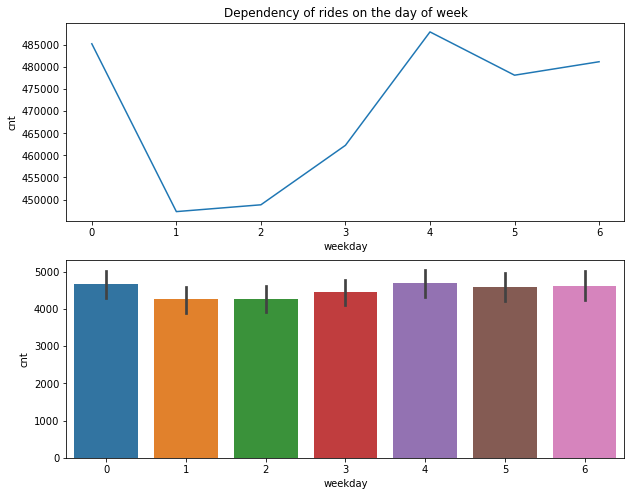

In [16]:
weekday_gp = df.groupby('weekday').sum()
plt.figure(figsize = (10,8))
plt.subplot(2,1,1)
plt.title("Dependency of rides on the day of week")
sns.lineplot(x ="weekday", y='cnt', data = weekday_gp)
plt.subplot(2,1,2)
sns.barplot(x = "weekday", y="cnt", data = df)
plt.show()

In [17]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, train_size =0.75, test_size = 0.25, random_state =333)

In [18]:
df_train.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,date
339,4,0,12,0,4,1,3,18.962500,22.82000,94.9583,15.583061,126,2468,2594,6
17,1,0,1,0,4,1,2,8.883347,11.61665,86.1667,9.833925,9,674,683,18
117,2,0,4,0,6,0,2,25.317500,28.94645,70.0833,21.500836,569,3489,4058,28
198,3,0,7,0,3,1,1,30.613347,35.19625,65.1250,14.458868,841,3617,4458,18
154,2,0,6,0,1,1,1,26.035000,29.73480,45.6250,8.250514,1869,3473,5342,4


In [19]:
season = ["spring", "summer", "fall", "winter"]
df_train["season"]= df_train.season.apply(lambda x : season[x-1])

In [20]:
df_train.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,date
339,winter,0,12,0,4,1,3,18.962500,22.82000,94.9583,15.583061,126,2468,2594,6
17,spring,0,1,0,4,1,2,8.883347,11.61665,86.1667,9.833925,9,674,683,18
117,summer,0,4,0,6,0,2,25.317500,28.94645,70.0833,21.500836,569,3489,4058,28
198,fall,0,7,0,3,1,1,30.613347,35.19625,65.1250,14.458868,841,3617,4458,18
154,summer,0,6,0,1,1,1,26.035000,29.73480,45.6250,8.250514,1869,3473,5342,4


In [21]:
df_train.season = df_train.season.astype("category")
df_train.mnth = df_train.mnth.astype("category")
df_train.weekday = df_train.weekday.astype("category")
df_train.weathersit = df_train.weathersit.astype("category")

In [22]:
df_train = pd.get_dummies(df_train, drop_first = True)

In [23]:
# df_train = pd.concat([df_train, season_dummies,mnth_dummies],axis=1)
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
339,0,0,1,18.962500,22.82000,94.9583,15.583061,126,2468,2594,...,0,1,0,0,0,1,0,0,0,1
17,0,0,1,8.883347,11.61665,86.1667,9.833925,9,674,683,...,0,0,0,0,0,1,0,0,1,0
117,0,0,0,25.317500,28.94645,70.0833,21.500836,569,3489,4058,...,0,0,0,0,0,0,0,1,1,0
198,0,0,1,30.613347,35.19625,65.1250,14.458868,841,3617,4458,...,0,0,0,0,1,0,0,0,0,0
154,0,0,1,26.035000,29.73480,45.6250,8.250514,1869,3473,5342,...,0,0,1,0,0,0,0,0,0,0


In [24]:
df_train.drop(["casual", "registered","date"], axis=1, inplace = True)
df_train.shape

(547, 30)

In [25]:
# preprocessing the data 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

num_vars = ["cnt", "windspeed", "hum", "atemp", "temp"]
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [26]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
339,0,0,1,0.502618,0.495297,0.986580,0.433320,0.295904,0,0,...,0,1,0,0,0,1,0,0,0,1
17,0,0,1,0.196298,0.201179,0.895238,0.256423,0.076047,1,0,...,0,0,0,0,0,1,0,0,1,0
117,0,0,0,0.695756,0.656133,0.728138,0.615407,0.464335,0,1,...,0,0,0,0,0,0,0,1,1,0
198,0,0,1,0.856704,0.820207,0.676623,0.398730,0.510354,0,0,...,0,0,0,0,1,0,0,0,0,0
154,0,0,1,0.717562,0.676829,0.474026,0.207702,0.612057,0,1,...,0,0,1,0,0,0,0,0,0,0


In [27]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,...,547.000000,547.000000,547.00000,547.000000,547.000000,547.000000,547.000000,547.00000,547.000000,547.000000
mean,0.504570,0.021938,0.692870,0.545001,0.519904,0.648712,0.346990,0.519153,0.244973,0.252285,...,0.085923,0.073126,0.13894,0.146252,0.146252,0.140768,0.140768,0.13894,0.343693,0.025594
std,0.500437,0.146615,0.461726,0.226243,0.211996,0.150155,0.158680,0.223139,0.430465,0.434722,...,0.280507,0.260582,0.34620,0.353682,0.353682,0.348100,0.348100,0.34620,0.475375,0.158066
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.352573,0.342851,0.532900,0.232053,0.369708,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.547268,0.530137,0.648052,0.328208,0.521284,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.741964,0.694240,0.758658,0.436564,0.692706,0.000000,1.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


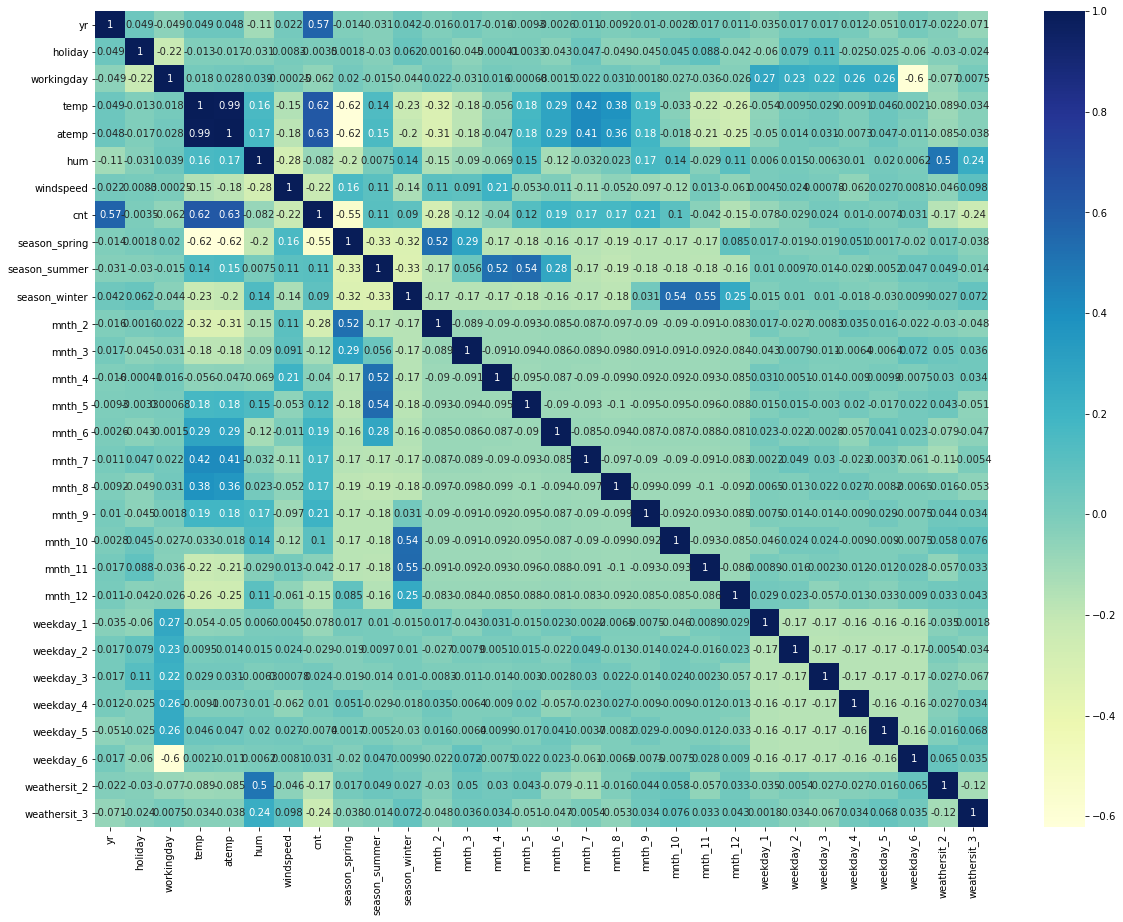

In [28]:
plt.figure(figsize = (20, 15))
sns.heatmap(df_train.corr(), annot = True, cmap = 'YlGnBu')
plt.show()

In [29]:
## Common function for regression model building and feature analysis
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
def regression(X_data, y_data):
    
    X_lm = sm.add_constant(X_data)
    lr = sm.OLS(y_data,X_lm).fit()
    print (lr.summary())

def vif(X_data):
    
    vif = pd.DataFrame()
    X = X_data
    vif["Features"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
    vif = vif.sort_values(by = "VIF", ascending = True)
    print(vif)

In [30]:
y_train = df_train.pop('cnt')
X_train = df_train

## Building Model

In [31]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [32]:
# Using RFE for initial feature selection

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm,15)
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [33]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', False, 11),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 9),
 ('season_winter', False, 4),
 ('mnth_2', False, 10),
 ('mnth_3', True, 1),
 ('mnth_4', False, 7),
 ('mnth_5', False, 5),
 ('mnth_6', False, 6),
 ('mnth_7', False, 14),
 ('mnth_8', False, 8),
 ('mnth_9', True, 1),
 ('mnth_10', True, 1),
 ('mnth_11', False, 12),
 ('mnth_12', False, 13),
 ('weekday_1', True, 1),
 ('weekday_2', True, 1),
 ('weekday_3', True, 1),
 ('weekday_4', False, 2),
 ('weekday_5', True, 1),
 ('weekday_6', False, 15),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1)]

In [34]:
X_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_2', 'mnth_3',
       'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10',
       'mnth_11', 'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5', 'weekday_6', 'weathersit_2', 'weathersit_3'],
      dtype='object')

In [35]:
# Extracting column slected during the RFE evaluation 

col = X_train.columns[rfe.support_]
col

Index(['yr', 'temp', 'atemp', 'hum', 'windspeed', 'season_spring', 'mnth_3',
       'mnth_9', 'mnth_10', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_5',
       'weathersit_2', 'weathersit_3'],
      dtype='object')

In [36]:
X_train = X_train[col]

In [37]:
regression(X_train,y_train)
vif(X_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     181.8
Date:                Mon, 07 Feb 2022   Prob (F-statistic):          7.23e-198
Time:                        22:06:05   Log-Likelihood:                 540.95
No. Observations:                 547   AIC:                            -1050.
Df Residuals:                     531   BIC:                            -981.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.4006      0.029     13.651

## LM 2

In [38]:
#Dropping weekday_5 because it is most insignificant variable in the model

X_train.drop("weekday_5", axis =1, inplace=True)
X_train.head()

,yr,temp,atemp,hum,windspeed,season_spring,mnth_3,mnth_9,mnth_10,weekday_1,weekday_2,weekday_3,weathersit_2,weathersit_3
339,0,0.502618,0.495297,0.986580,0.433320,0,0,0,0,0,0,0,0,1
17,0,0.196298,0.201179,0.895238,0.256423,1,0,0,0,0,0,0,1,0
117,0,0.695756,0.656133,0.728138,0.615407,0,0,0,0,0,0,0,1,0
198,0,0.856704,0.820207,0.676623,0.398730,0,0,0,0,0,0,1,0,0
154,0,0.717562,0.676829,0.474026,0.207702,0,0,0,0,1,0,0,0,0


In [39]:
regression(X_train, y_train)
vif(X_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     195.0
Date:                Mon, 07 Feb 2022   Prob (F-statistic):          5.95e-199
Time:                        22:06:05   Log-Likelihood:                 540.79
No. Observations:                 547   AIC:                            -1052.
Df Residuals:                     532   BIC:                            -987.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3999      0.029     13.648

## LM3

In [40]:
# removal of atemp beacuse of insignificance  

X_train.drop(["atemp"], axis =1, inplace=True)
regression(X_train, y_train)
vif(X_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     209.3
Date:                Mon, 07 Feb 2022   Prob (F-statistic):          1.25e-199
Time:                        22:06:06   Log-Likelihood:                 539.62
No. Observations:                 547   AIC:                            -1051.
Df Residuals:                     533   BIC:                            -991.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.4042      0.029     13.843

## LM4

In [41]:
# here not dropping humidity as in my view it can be helpful predictor hence dropping weekday_3 based on the lowest significance

X_train.drop(["weekday_3"], axis =1, inplace=True)
regression(X_train, y_train)
vif(X_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     225.0
Date:                Mon, 07 Feb 2022   Prob (F-statistic):          6.81e-200
Time:                        22:06:06   Log-Likelihood:                 537.43
No. Observations:                 547   AIC:                            -1049.
Df Residuals:                     534   BIC:                            -992.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.4020      0.029     13.734

In [42]:
# dropping weekday_1 based on insignificance
 
X_train.drop(["weekday_1"], axis =1, inplace=True)
regression(X_train, y_train)
vif(X_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     243.6
Date:                Mon, 07 Feb 2022   Prob (F-statistic):          3.52e-200
Time:                        22:06:06   Log-Likelihood:                 535.26
No. Observations:                 547   AIC:                            -1047.
Df Residuals:                     535   BIC:                            -994.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3978      0.029     13.583

In [43]:
# Humidity is still showing very high VIF hence shocasing the multicollinearity, dropping the predictor

X_train.drop(["hum"], axis =1, inplace=True)
regression(X_train, y_train)
vif(X_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     257.8
Date:                Mon, 07 Feb 2022   Prob (F-statistic):          1.70e-197
Time:                        22:06:06   Log-Likelihood:                 526.05
No. Observations:                 547   AIC:                            -1030.
Df Residuals:                     536   BIC:                            -982.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3023      0.019     15.686

In [44]:
# Now our predictors hav low multicollinearity, removing weekday_2 based on insignificance

X_train.drop(["weekday_2"], axis =1, inplace=True)
regression(X_train, y_train)
vif(X_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     281.0
Date:                Mon, 07 Feb 2022   Prob (F-statistic):          9.86e-197
Time:                        22:06:06   Log-Likelihood:                 521.33
No. Observations:                 547   AIC:                            -1023.
Df Residuals:                     537   BIC:                            -979.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2980      0.019     15.388

## Training on Final Model

In [45]:
# Now we have selected our final model, now creating the model for prediction

X_train_lmf = sm.add_constant(X_train)
lr_final = sm.OLS(y_train,X_train_lmf).fit()
lr_final.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     281.0
Date:                Mon, 07 Feb 2022   Prob (F-statistic):          9.86e-197
Time:                        22:06:06   Log-Likelihood:                 521.33
No. Observations:                 547   AIC:                            -1023.
Df Residuals:                     537   BIC:                            -979.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2980      0.019     15.388      0.000       0.260       0.336
yr                0.2361      0.008     29.176      0.000       0.220       0.252
temp              0.3732      0.023     15.974      0.000       0.327       0.419
windspeed        -0.1399      0.026     -5.329      0.000      -0.192      -0.088
season_spring    -0.1504      0.013    -11.870      0.000      -0.175      -0.125
mnth_3            0.0588      0.015      3.815      0.000       0.029       0.089
mnth_9            0.0817      0.015      5.438      0.000       0.052       0.111
mnth_10           0.0792      0.015      5.190      0.000       0.049       0.109
weathersit_2     -0.0769      0.009     -8.896      0.000      -0.094      -0.060
weathersit_3     -0.3121      0.026    -11.940      0.000      -0.363      -0.261
==============================================================================
Omnibus:                       92.401   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              221.342
Skew:                          -0.877   Prob(JB):                     8.63e-49
Kurtosis:                       5.576   Cond. No.                         11.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
y_train_predict = lr_final.predict(X_train_lmf)

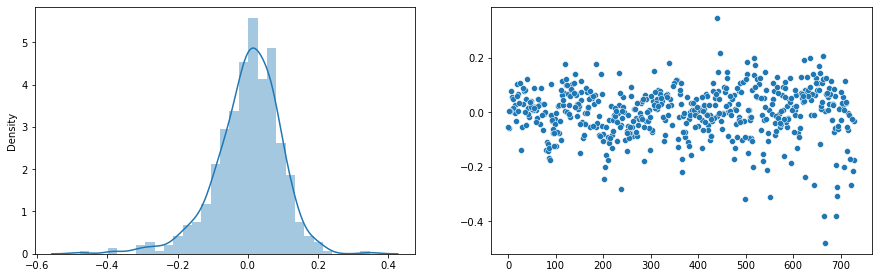

In [47]:
res = y_train-y_train_predict
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.distplot(res)
plt.subplot(2,2,2)
sns.scatterplot(data = res)
plt.show()

Here we can see the residual follows the normal distributions and are scattered randomly in a plane. Hence proving the assumptions.

## Prediction

In [48]:
df_test.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,date
22,1,0,1,0,2,1,1,3.957390,4.941955,43.6522,16.522200,150,836,986,23
468,2,1,4,0,0,0,1,20.295000,24.399800,50.2917,12.791439,2795,4665,7460,14
553,3,1,7,0,1,1,1,33.722500,39.519800,57.3750,8.417143,1203,3469,4672,8
504,2,1,5,0,1,1,1,25.454153,29.198350,53.0417,17.042589,2704,4425,7129,20
353,4,0,12,0,4,1,2,15.819153,19.822700,59.5417,4.125244,216,3534,3750,20


In [49]:
## prepocessing the test data

season = ["spring", "summer", "fall", "winter"]
df_test["season"]= df_test.season.apply(lambda x : season[x-1])

## changing in variable category
df_test.season = df_test.season.astype("category")
df_test.mnth = df_test.mnth.astype("category")
df_test.weekday = df_test.weekday.astype("category")
df_test.weathersit = df_test.weathersit.astype("category")

df_test = pd.get_dummies(df_test, drop_first = True)
df_test.drop(["casual", "registered","date"], axis=1, inplace = True)
df_test.shape

(183, 30)

In [50]:
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
22,0,0,1,3.957390,4.941955,43.6522,16.522200,986,1,0,...,0,0,0,1,0,0,0,0,0,0
468,1,0,0,20.295000,24.399800,50.2917,12.791439,7460,0,1,...,0,0,0,0,0,0,0,0,0,0
553,1,0,1,33.722500,39.519800,57.3750,8.417143,4672,0,0,...,0,0,1,0,0,0,0,0,0,0
504,1,0,1,25.454153,29.198350,53.0417,17.042589,7129,0,1,...,0,0,1,0,0,0,0,0,0,0
353,0,0,1,15.819153,19.822700,59.5417,4.125244,3750,0,0,...,0,1,0,0,0,1,0,0,1,0


In [51]:
num_vars = ["cnt", "windspeed", "hum", "atemp", "temp"]
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
22,0,0,1,0.046591,0.025950,0.453529,0.462217,0.110907,1,0,...,0,0,0,1,0,0,0,0,0,0
468,1,0,0,0.543115,0.536771,0.522511,0.347424,0.855729,0,1,...,0,0,0,0,0,0,0,0,0,0
553,1,0,1,0.951196,0.933712,0.596104,0.212829,0.534975,0,0,...,0,0,1,0,0,0,0,0,0,0
504,1,0,1,0.699909,0.662746,0.551083,0.478229,0.817648,0,1,...,0,0,1,0,0,0,0,0,0,0
353,0,0,1,0.407087,0.416610,0.618615,0.080770,0.428900,0,0,...,0,1,0,0,0,1,0,0,1,0


In [52]:
y_test = df_test.pop("cnt")
X_test = df_test

In [53]:
X_test = X_test[X_train.columns]
X_test.head()

,yr,temp,windspeed,season_spring,mnth_3,mnth_9,mnth_10,weathersit_2,weathersit_3
22,0,0.046591,0.462217,1,0,0,0,0,0
468,1,0.543115,0.347424,0,0,0,0,0,0
553,1,0.951196,0.212829,0,0,0,0,0,0
504,1,0.699909,0.478229,0,0,0,0,0,0
353,0,0.407087,0.080770,0,0,0,0,1,0


In [54]:
X_test_sm = sm.add_constant(X_test)
y_test_predict = lr_final.predict(X_test_sm)

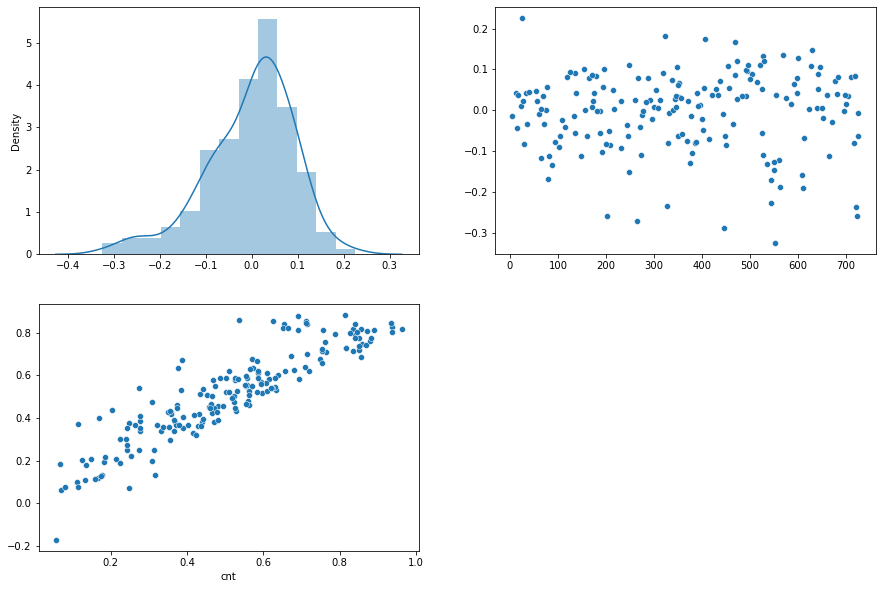

In [55]:
res_test = y_test-y_test_predict
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.distplot(res_test)
plt.subplot(2,2,2)
sns.scatterplot(data = res_test)
plt.subplot(2,2,3)
sns.scatterplot(x= y_test, y = y_test_predict)
plt.show()

In [56]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_test_predict)
r2

0.8139748912983634

In [57]:
n = X_test.shape[0]
p = X_test.shape[1]
adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.8042972844872956

Based on our final model we get the r2 = 81% and adjusted R2 = 80.4%